<a href="https://colab.research.google.com/github/why-aditi/Automobile-Sales-Data-Analysis-and-Prediction/blob/main/Automobile_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Kaggle API

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Data

In [3]:
!kaggle datasets download -d ddosad/auto-sales-data
!unzip /content/auto-sales-data.zip -d /content/auto_sales_data

Dataset URL: https://www.kaggle.com/datasets/ddosad/auto-sales-data
License(s): other
  0% 0.00/79.2k [00:00<?, ?B/s]
100% 79.2k/79.2k [00:00<00:00, 103MB/s]
Archive:  /content/auto-sales-data.zip
  inflating: /content/auto_sales_data/Auto Sales data.csv  


# Load and Explore Data

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

data = pd.read_csv('/content/auto_sales_data/Auto Sales data.csv')

data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [5]:
data.columns.tolist()

['ORDERNUMBER',
 'QUANTITYORDERED',
 'PRICEEACH',
 'ORDERLINENUMBER',
 'SALES',
 'ORDERDATE',
 'DAYS_SINCE_LASTORDER',
 'STATUS',
 'PRODUCTLINE',
 'MSRP',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'PHONE',
 'ADDRESSLINE1',
 'CITY',
 'POSTALCODE',
 'COUNTRY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

In [6]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

# Add a new column for year of order
data["order_year"] = data["ORDERDATE"].dt.year

# Format 'ORDERDATE' column as "Month Year"
data["ORDERDATE"] = data["ORDERDATE"].dt.strftime("%b %Y")

data

<ipython-input-6-ff7f00995966>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,order_year
0,10107,30,95.70,2,2871.00,Feb 2018,828,Shipped,Motorcycles,95,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2018
1,10121,34,81.35,5,2765.90,May 2018,757,Shipped,Motorcycles,95,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,2018
2,10134,41,94.74,2,3884.34,Jul 2018,703,Shipped,Motorcycles,95,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,2018
3,10145,45,83.26,6,3746.70,Aug 2018,649,Shipped,Motorcycles,95,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,2018
4,10168,36,96.66,1,3479.76,Oct 2018,586,Shipped,Motorcycles,95,...,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,Dec 2019,2924,Shipped,Ships,54,...,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small,2019
2743,10373,29,137.19,1,3978.51,Jan 2020,2865,Shipped,Ships,54,...,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium,2020
2744,10386,43,125.99,4,5417.57,Mar 2020,2836,Resolved,Ships,54,...,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium,2020
2745,10397,34,62.24,1,2116.16,Mar 2020,2810,Shipped,Ships,54,...,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small,2020


In [7]:
data.drop(columns=["ORDERNUMBER", "PRICEEACH", "ORDERLINENUMBER", "MSRP", \
                           "PRODUCTCODE", "PHONE", "ADDRESSLINE1", "CITY", "POSTALCODE", \
                           "DAYS_SINCE_LASTORDER", "CONTACTLASTNAME", "CONTACTFIRSTNAME"], inplace=True)

data

,QUANTITYORDERED,SALES,ORDERDATE,STATUS,PRODUCTLINE,CUSTOMERNAME,COUNTRY,DEALSIZE,order_year
0,30,2871.00,Feb 2018,Shipped,Motorcycles,Land of Toys Inc.,USA,Small,2018
1,34,2765.90,May 2018,Shipped,Motorcycles,Reims Collectables,France,Small,2018
2,41,3884.34,Jul 2018,Shipped,Motorcycles,Lyon Souveniers,France,Medium,2018
3,45,3746.70,Aug 2018,Shipped,Motorcycles,Toys4GrownUps.com,USA,Medium,2018
4,36,3479.76,Oct 2018,Shipped,Motorcycles,Technics Stores Inc.,USA,Medium,2018
...,...,...,...,...,...,...,...,...,...
2742,20,2244.40,Dec 2019,Shipped,Ships,Euro Shopping Channel,Spain,Small,2019
2743,29,3978.51,Jan 2020,Shipped,Ships,"Oulu Toy Supplies, Inc.",Finland,Medium,2020
2744,43,5417.57,Mar 2020,Resolved,Ships,Euro Shopping Channel,Spain,Medium,2020
2745,34,2116.16,Mar 2020,Shipped,Ships,Alpha Cognac,France,Small,2020


In [8]:
data["customer"] = data["CUSTOMERNAME"] + " (" + data["COUNTRY"] + ")"
data.drop(columns=["CUSTOMERNAME", "COUNTRY"], inplace = True)

data

,QUANTITYORDERED,SALES,ORDERDATE,STATUS,PRODUCTLINE,DEALSIZE,order_year,customer
0,30,2871.00,Feb 2018,Shipped,Motorcycles,Small,2018,Land of Toys Inc. (USA)
1,34,2765.90,May 2018,Shipped,Motorcycles,Small,2018,Reims Collectables (France)
2,41,3884.34,Jul 2018,Shipped,Motorcycles,Medium,2018,Lyon Souveniers (France)
3,45,3746.70,Aug 2018,Shipped,Motorcycles,Medium,2018,Toys4GrownUps.com (USA)
4,36,3479.76,Oct 2018,Shipped,Motorcycles,Medium,2018,Technics Stores Inc. (USA)
...,...,...,...,...,...,...,...,...
2742,20,2244.40,Dec 2019,Shipped,Ships,Small,2019,Euro Shopping Channel (Spain)
2743,29,3978.51,Jan 2020,Shipped,Ships,Medium,2020,"Oulu Toy Supplies, Inc. (Finland)"
2744,43,5417.57,Mar 2020,Resolved,Ships,Medium,2020,Euro Shopping Channel (Spain)
2745,34,2116.16,Mar 2020,Shipped,Ships,Small,2020,Alpha Cognac (France)


In [9]:
data.isnull().sum()

QUANTITYORDERED    0
SALES              0
ORDERDATE          0
STATUS             0
PRODUCTLINE        0
DEALSIZE           0
order_year         0
customer           0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2747 non-null   int64  
 1   SALES            2747 non-null   float64
 2   ORDERDATE        2747 non-null   object 
 3   STATUS           2747 non-null   object 
 4   PRODUCTLINE      2747 non-null   object 
 5   DEALSIZE         2747 non-null   object 
 6   order_year       2747 non-null   int32  
 7   customer         2747 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 161.1+ KB


In [12]:
data.shape

(2747, 8)

In [13]:
data.dtypes

QUANTITYORDERED      int64
SALES              float64
ORDERDATE           object
STATUS              object
PRODUCTLINE         object
DEALSIZE            object
order_year           int32
customer            object
dtype: object

In [14]:
data.describe(include = "all")

,QUANTITYORDERED,SALES,ORDERDATE,STATUS,PRODUCTLINE,DEALSIZE,order_year,customer
count,2747.000000,2747.000000,2747,2747,2747,2747,2747.000000,2747
unique,NaN,NaN,29,6,7,3,NaN,89
top,NaN,NaN,Nov 2018,Shipped,Classic Cars,Medium,NaN,Euro Shopping Channel (Spain)
freq,NaN,NaN,296,2541,949,1349,NaN,259
mean,35.103021,3553.047583,NaN,NaN,NaN,NaN,2018.822352,NaN
std,9.762135,1838.953901,NaN,NaN,NaN,NaN,0.696288,NaN
min,6.000000,482.130000,NaN,NaN,NaN,NaN,2018.000000,NaN
25%,27.000000,2204.350000,NaN,NaN,NaN,NaN,2018.000000,NaN
50%,35.000000,3184.800000,NaN,NaN,NaN,NaN,2019.000000,NaN
75%,43.000000,4503.095000,NaN,NaN,NaN,NaN,2019.000000,NaN


Distribution of STATUS
____________________________________________________________





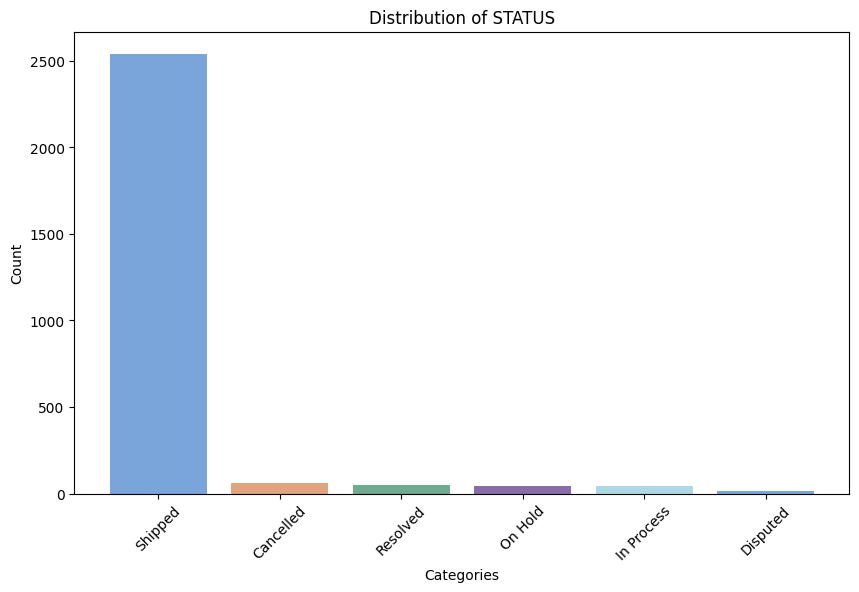

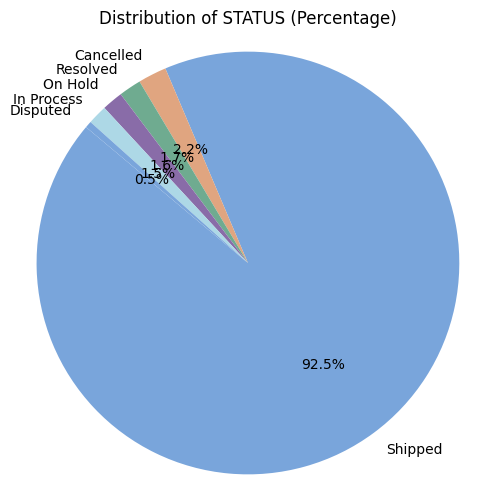




Distribution of PRODUCTLINE
____________________________________________________________





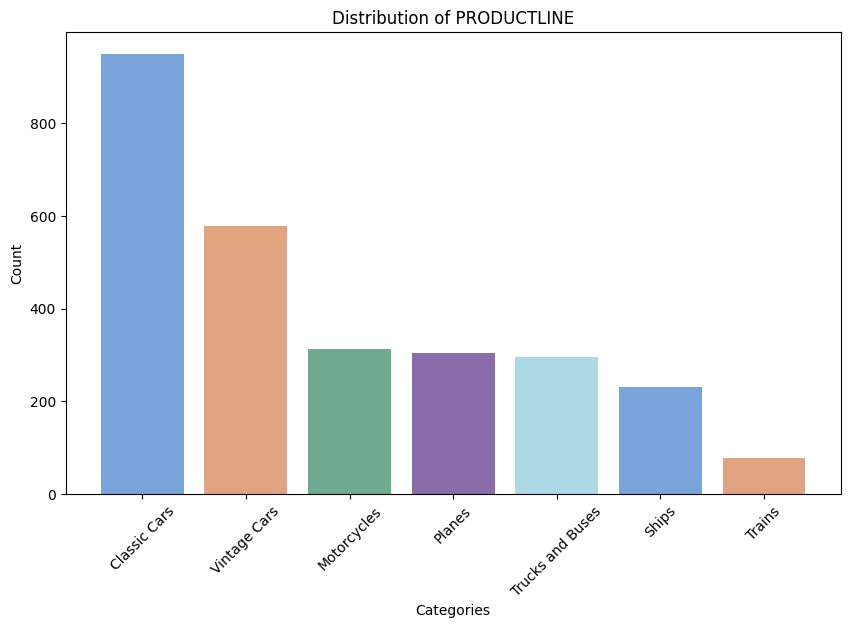

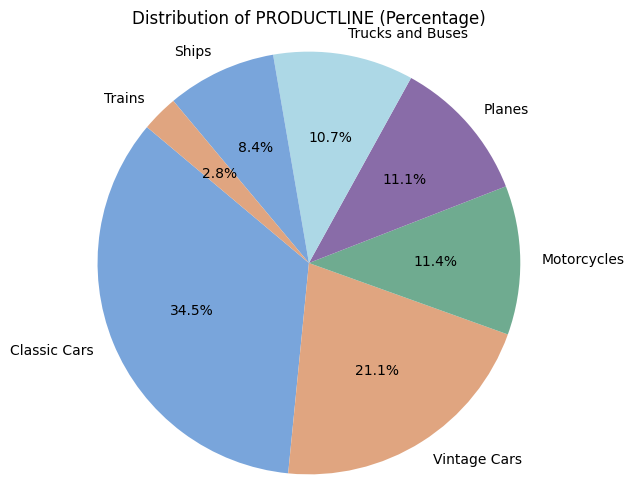




Distribution of DEALSIZE
____________________________________________________________





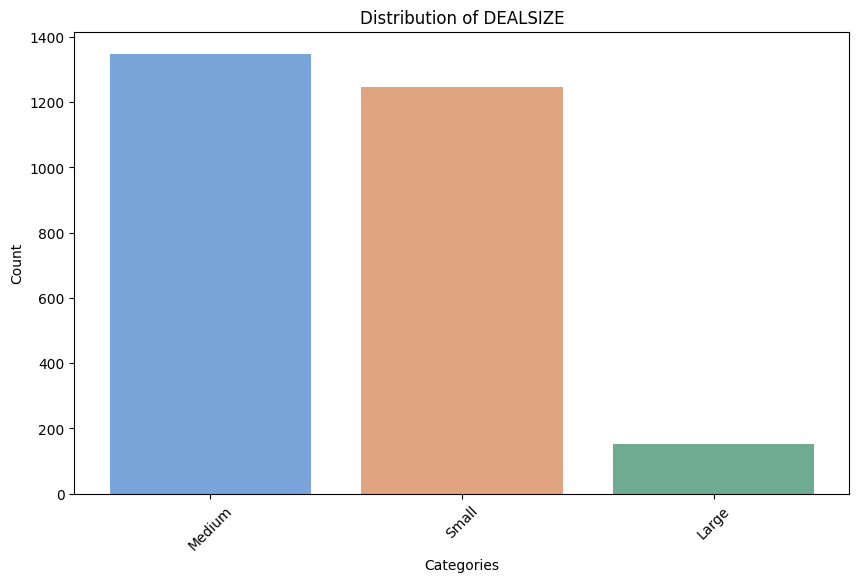

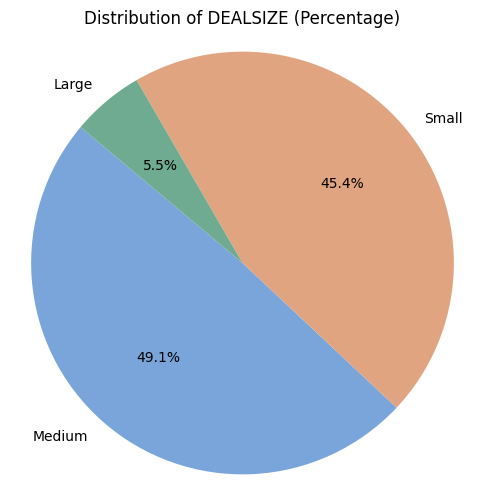

In [15]:
import matplotlib.pyplot as plt

def univariateAnalysis_category(cols, cat_columns):
    # Distribution of categories
    print("Distribution of", cols)
    print("_" * 60)

    # Count values and prepare data
    value_counts = cat_columns[cols].value_counts()
    categories = value_counts.index
    counts = value_counts.values

    print("\n\n")

    # Bar plot
    plt.figure(figsize=(10, 6))
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    plt.bar(categories, counts, color=colors)
    plt.title(f'Distribution of {cols}')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    print("\n\n")

    # Pie chart
    percentage = (value_counts / value_counts.sum()) * 100

    plt.figure(figsize=(6, 6))
    plt.pie(percentage, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {cols} (Percentage)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    print("\n\n")

# Example usage
df = data.copy()
df = pd.DataFrame({
    'STATUS': ['Shipped', 'Cancelled', 'Resolved', 'On Hold', 'Disputed', 'In Process'],
    'PRODUCTLINE': ['Motorcycles', 'Classic Cars', 'Planes', 'Ships', 'Trains', 'Trucks and Buses'],
    'DEALSIZE': ['Small', 'Large', 'Medium', 'Small', 'Large', 'Medium']
})

cat_columns = data[['STATUS', 'PRODUCTLINE', 'DEALSIZE']]

for col in cat_columns:
    univariateAnalysis_category(col, cat_columns)


# Data Preprocessing

In [16]:
X = data.drop(columns=['SALES'])
y = data['SALES']

categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [17]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(y)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = X[:split_size], y[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2197, 550, 2197, 550)

In [18]:
X_train = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test = preprocessor.transform(X_test)

# Display shapes of transformed data
print(f"X_train shape after preprocessing: {X_train.shape}")
print(f"X_test shape after preprocessing: {X_test.shape}")

X_train = X_train.toarray()
X_test = X_test.toarray()

X_train shape after preprocessing: (2197, 131)
X_test shape after preprocessing: (550, 131)


# Models

In [19]:
import tensorflow as tf

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

In [21]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Model 1: Simple Dense Model

In [60]:
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(128, activation='relu', input_dim=X_train.shape[1]),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               16896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [61]:
history_1 = model_1.fit(X_train, y_train,
                        epochs=100,
                        validation_data=(X_test, y_test),
                        callbacks=[create_tensorboard_callback('logs', 'model_1'),
                                   early_stopping,
                                   model_checkpoint,
                                   reduce_lr])

Saving TensorBoard log files to: logs/model_1/20240607-184337
Epoch 1/100
69/69 [==============================] - 1s 6ms/step - loss: 3627.2224 - mae: 3627.2224 - val_loss: 2695.6094 - val_mae: 2695.6094 - lr: 0.0100
Epoch 2/100
69/69 [==============================] - 0s 4ms/step - loss: 3320.8135 - mae: 3320.8135 - val_loss: 2965.5542 - val_mae: 2965.5542 - lr: 0.0100
Epoch 3/100
63/69 [==========================>...] - ETA: 0s - loss: 2932.5969 - mae: 2932.5969
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
69/69 [==============================] - 0s 5ms/step - loss: 2841.9380 - mae: 2841.9380 - val_loss: 4585.1328 - val_mae: 4585.1328 - lr: 0.0100
Epoch 4/100
69/69 [==============================] - 0s 5ms/step - loss: 1214.8420 - mae: 1214.8420 - val_loss: 649.4510 - val_mae: 649.4510 - lr: 0.0020
Epoch 5/100
69/69 [==============================] - 0s 5ms/step - loss: 1034.4250 - mae: 1034.4250 - val_loss: 905.9761 - val_mae: 905.9761 - lr: 0.0020
Ep

In [62]:
predictions = model_1.predict(X_test)

18/18 [==============================] - 0s 2ms/step


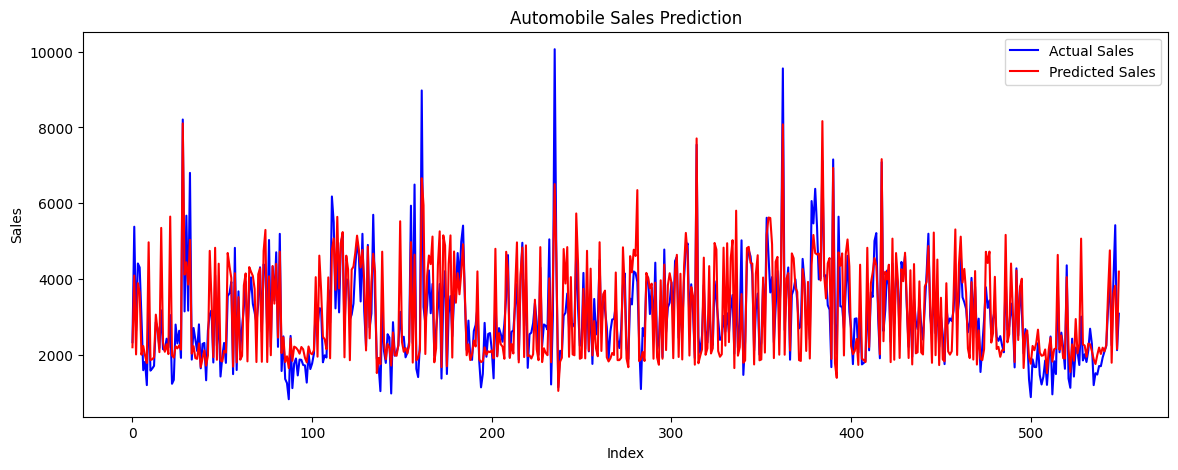

In [63]:
plt.figure(figsize=(14, 5))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Sales')
plt.plot(range(len(predictions)), predictions, color='red', label='Predicted Sales')
plt.title('Automobile Sales Prediction')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [26]:
def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)

    # Handle cases where y_true is close to zero
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy()
    }

In [64]:
model_1.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 575.8794 - mae: 575.8794


[575.87939453125, 575.87939453125]

In [65]:
model_1_preds = tf.squeeze(model_1.predict(X_test))
model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2193.2004, 4087.4097, 2003.8646, 3886.2346, 3645.39  , 1997.3494,
       2226.4546, 1971.6289, 1777.3376, 4965.601 ], dtype=float32)>

In [66]:
model_1_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_1_preds)
model_1_results

{'mae': 575.8794, 'mse': 551668.1, 'rmse': 742.74365, 'mape': 20.273466}

## Model 2: Bidirectional LSTM

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional

model_2 = Sequential([
    Bidirectional(LSTM(128, activation='tanh', return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Bidirectional(LSTM(64, activation='tanh', return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(32, activation='tanh')),
    Dropout(0.2),
    Dense(1)
])

model_2.compile(loss='mae', optimizer='sgd', metrics=['mae'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 131, 256)          133120    
 al)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 131, 256)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 131, 128)          164352    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 131, 128)          0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                      

In [31]:
history_2 = model_2.fit(
            X_train, y_train,
            epochs=100,
            validation_data=(X_test, y_test),
            callbacks=[create_tensorboard_callback('logs', 'model_2'),
                                   early_stopping,
                                   model_checkpoint,
                                   reduce_lr])

Saving TensorBoard log files to: logs/model_2/20240607-183142
Epoch 1/100
69/69 [==============================] - 14s 67ms/step - loss: 3682.2815 - mae: 3682.2815 - val_loss: 3015.2266 - val_mae: 3015.2266 - lr: 0.0100
Epoch 2/100
69/69 [==============================] - 2s 30ms/step - loss: 3661.9265 - mae: 3661.9265 - val_loss: 2980.5750 - val_mae: 2980.5750 - lr: 0.0100
Epoch 3/100
69/69 [==============================] - 2s 35ms/step - loss: 3619.8530 - mae: 3619.8530 - val_loss: 2935.9382 - val_mae: 2935.9382 - lr: 0.0100
Epoch 4/100
69/69 [==============================] - 3s 38ms/step - loss: 3574.9604 - mae: 3574.9604 - val_loss: 2890.9470 - val_mae: 2890.9470 - lr: 0.0100
Epoch 5/100
69/69 [==============================] - 2s 31ms/step - loss: 3529.7788 - mae: 3529.7788 - val_loss: 2845.9644 - val_mae: 2845.9644 - lr: 0.0100
Epoch 6/100
69/69 [==============================] - 2s 30ms/step - loss: 3485.3494 - mae: 3485.3494 - val_loss: 2801.1431 - val_mae: 2801.1431 - lr: 0.

In [32]:
predictions_2 = model_2.predict(X_test)

18/18 [==============================] - 3s 20ms/step


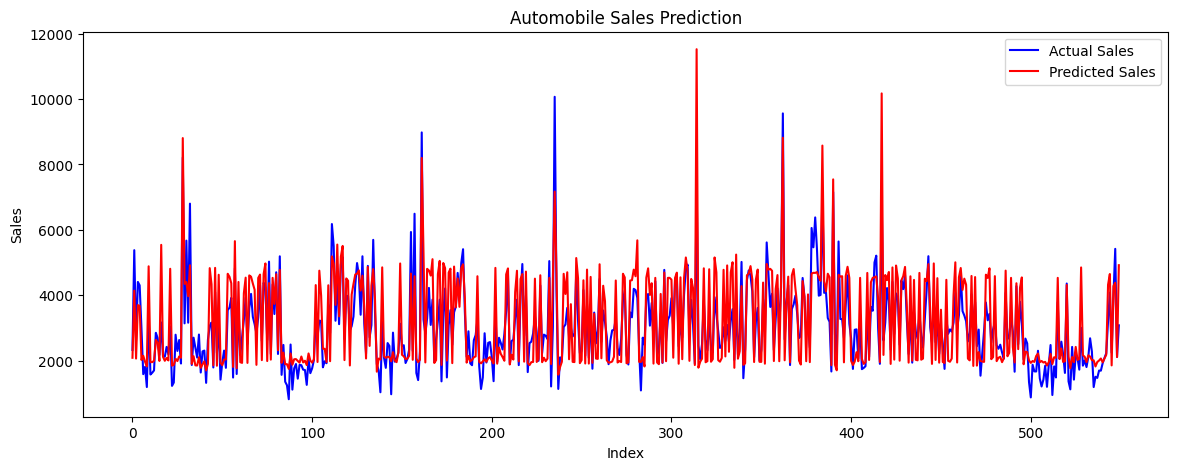

In [33]:
plt.figure(figsize=(14, 5))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Sales')
plt.plot(range(len(predictions_2)), predictions, color='red', label='Predicted Sales')
plt.title('Automobile Sales Prediction')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [34]:
model_2.evaluate(X_test, y_test)

18/18 [==============================] - 0s 12ms/step - loss: 914.9642 - mae: 914.9642


[914.9642333984375, 914.9642333984375]

In [35]:
model_2_preds = tf.squeeze(model_2.predict(X_test))
model_2_preds[:10]

18/18 [==============================] - 0s 12ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2811.9531, 2811.9531, 2811.9531, 2811.9531, 2811.9531, 2811.9531,
       2811.9531, 2811.9531, 2811.9531, 2811.9531], dtype=float32)>

In [36]:
model_2_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_2_preds)
model_2_results

{'mae': 914.9645, 'mse': 1594477.1, 'rmse': 1262.7261, 'mape': 33.383568}

## Model 3: CNN

In [37]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

model_3= Sequential([
    Conv1D(filters=64, kernel_size=2, activation='tanh', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(50, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

model_3.compile(loss='mae', optimizer='sgd', metrics=['mae'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 130, 64)           192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 65, 64)            0         
 D)                                                              
                                                                 
 lstm_3 (LSTM)               (None, 50)                23000     
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 23243 (90.79 KB)
Trainable params: 23243 (90.79 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [38]:
history_3 = model_3.fit(
            X_train, y_train,
            epochs=100,
            validation_data=(X_test, y_test),
            callbacks=[create_tensorboard_callback('logs', 'model_3'),
                                   early_stopping,
                                   model_checkpoint,
                                   reduce_lr])

Saving TensorBoard log files to: logs/model_3/20240607-183616
Epoch 1/100
69/69 [==============================] - 4s 16ms/step - loss: 3682.8396 - mae: 3682.8396 - val_loss: 3017.0352 - val_mae: 3017.0352 - lr: 0.0100
Epoch 2/100
69/69 [==============================] - 0s 7ms/step - loss: 3666.9829 - mae: 3666.9829 - val_loss: 2990.5752 - val_mae: 2990.5752 - lr: 0.0100
Epoch 3/100
69/69 [==============================] - 1s 7ms/step - loss: 3634.8140 - mae: 3634.8140 - val_loss: 2955.9180 - val_mae: 2955.9180 - lr: 0.0100
Epoch 4/100
69/69 [==============================] - 0s 7ms/step - loss: 3599.7480 - mae: 3599.7480 - val_loss: 2920.7158 - val_mae: 2920.7158 - lr: 0.0100
Epoch 5/100
69/69 [==============================] - 0s 7ms/step - loss: 3564.9260 - mae: 3564.9260 - val_loss: 2885.6243 - val_mae: 2885.6243 - lr: 0.0100
Epoch 6/100
69/69 [==============================] - 0s 7ms/step - loss: 3529.2307 - mae: 3529.2307 - val_loss: 2850.3867 - val_mae: 2850.3867 - lr: 0.0100
E

In [39]:
predictions_3 = model_3.predict(X_test)

18/18 [==============================] - 0s 3ms/step


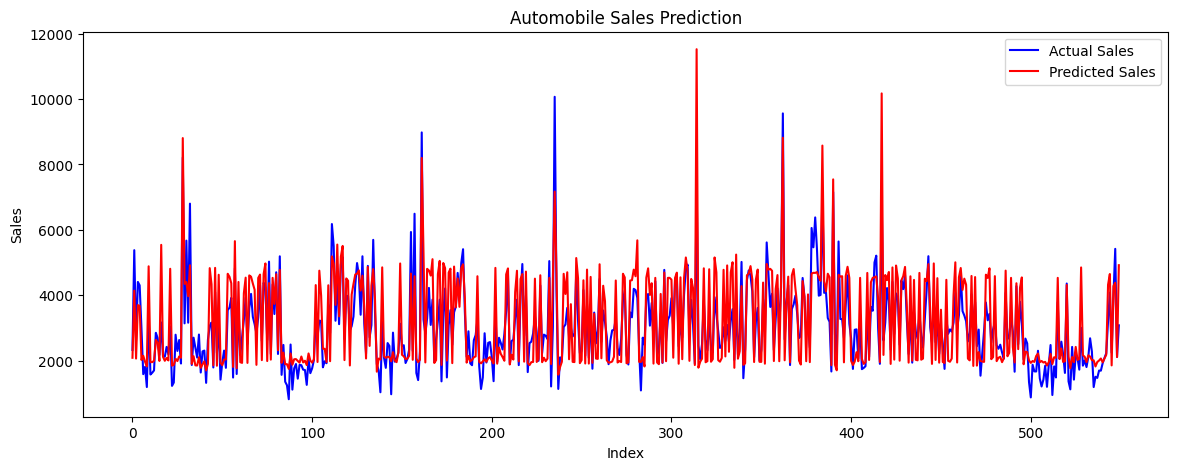

In [40]:
plt.figure(figsize=(14, 5))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Sales')
plt.plot(range(len(predictions_3)), predictions, color='red', label='Predicted Sales')
plt.title('Automobile Sales Prediction')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [41]:
model_3.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 946.1754 - mae: 946.1754


[946.1753540039062, 946.1753540039062]

In [42]:
model_3_preds = tf.squeeze(model_3.predict(X_test))
model_3_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2545.435, 2545.435, 2545.435, 2545.435, 2545.435, 2545.435,
       2545.435, 2545.435, 2545.435, 2545.435], dtype=float32)>

In [43]:
model_3_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_3_preds)
model_3_results

{'mae': 946.1755, 'mse': 1778701.6, 'rmse': 1333.6797, 'mape': 31.365372}

## Model 4: Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

model_4 = RandomForestRegressor(n_estimators=200)

In [45]:
model_4.fit(X_train, y_train)
predictions_4 = model_4.predict(X_test)

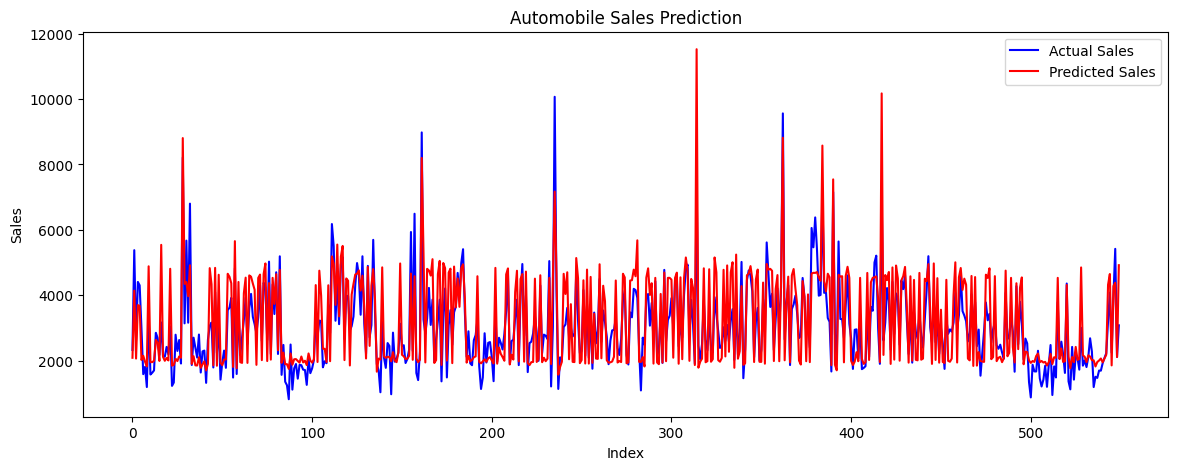

In [46]:
plt.figure(figsize=(14, 5))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Sales')
plt.plot(range(len(predictions_4)), predictions, color='red', label='Predicted Sales')
plt.title('Automobile Sales Prediction')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [47]:
model_4_preds = tf.squeeze(model_4.predict(X_test))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([1914.32505   , 4102.24963   , 1595.954925  , 4084.404675  ,
       3310.99038333, 2037.420525  , 1839.57505   , 1907.805     ,
       1916.55025   , 4957.26519345])>

In [48]:
model_4_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_4_preds)
model_4_results

{'mae': 610.2153, 'mse': 610762.2, 'rmse': 781.51276, 'mape': 22.016968}

## Model 5:

In [49]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, Flatten
from tensorflow.keras.layers import Input, Add, Activation
from tensorflow.keras.models import Model

In [50]:
X

,QUANTITYORDERED,ORDERDATE,STATUS,PRODUCTLINE,DEALSIZE,order_year,customer
0,30,Feb 2018,Shipped,Motorcycles,Small,2018,Land of Toys Inc. (USA)
1,34,May 2018,Shipped,Motorcycles,Small,2018,Reims Collectables (France)
2,41,Jul 2018,Shipped,Motorcycles,Medium,2018,Lyon Souveniers (France)
3,45,Aug 2018,Shipped,Motorcycles,Medium,2018,Toys4GrownUps.com (USA)
4,36,Oct 2018,Shipped,Motorcycles,Medium,2018,Technics Stores Inc. (USA)
...,...,...,...,...,...,...,...
2742,20,Dec 2019,Shipped,Ships,Small,2019,Euro Shopping Channel (Spain)
2743,29,Jan 2020,Shipped,Ships,Medium,2020,"Oulu Toy Supplies, Inc. (Finland)"
2744,43,Mar 2020,Resolved,Ships,Medium,2020,Euro Shopping Channel (Spain)
2745,34,Mar 2020,Shipped,Ships,Small,2020,Alpha Cognac (France)


In [51]:
def TCN_block(x, dilation_rate):
    conv = Conv1D(filters=128, kernel_size=2, padding='causal', dilation_rate=dilation_rate)(x)
    conv = Activation('relu')(conv)
    conv = Dropout(0.2)(conv)
    conv = Conv1D(filters=128, kernel_size=2, padding='causal', dilation_rate=dilation_rate)(conv)
    conv = Activation('relu')(conv)
    conv = Dropout(0.2)(conv)

    shortcut = Conv1D(filters=128, kernel_size=1, padding='same')(x)

    x = Add()([shortcut, conv])
    return x

input_layer = Input(shape=(X_train.shape[1], 1))
x = TCN_block(input_layer, dilation_rate=1)
x = TCN_block(x, dilation_rate=2)
x = TCN_block(x, dilation_rate=4)
x = Flatten()(x)
output_layer = Dense(1)(x)
model_5 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model_5.compile(loss='mae', optimizer='adam', metrics=['mae'])

model_5.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 131, 1)]             0         []                            
                                                                                                  
 conv1d_1 (Conv1D)           (None, 131, 128)             384       ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 131, 128)             0         ['conv1d_1[0][0]']            
                                                                                                  
 dropout_7 (Dropout)         (None, 131, 128)             0         ['activation[0][0]']          
                                                                                              

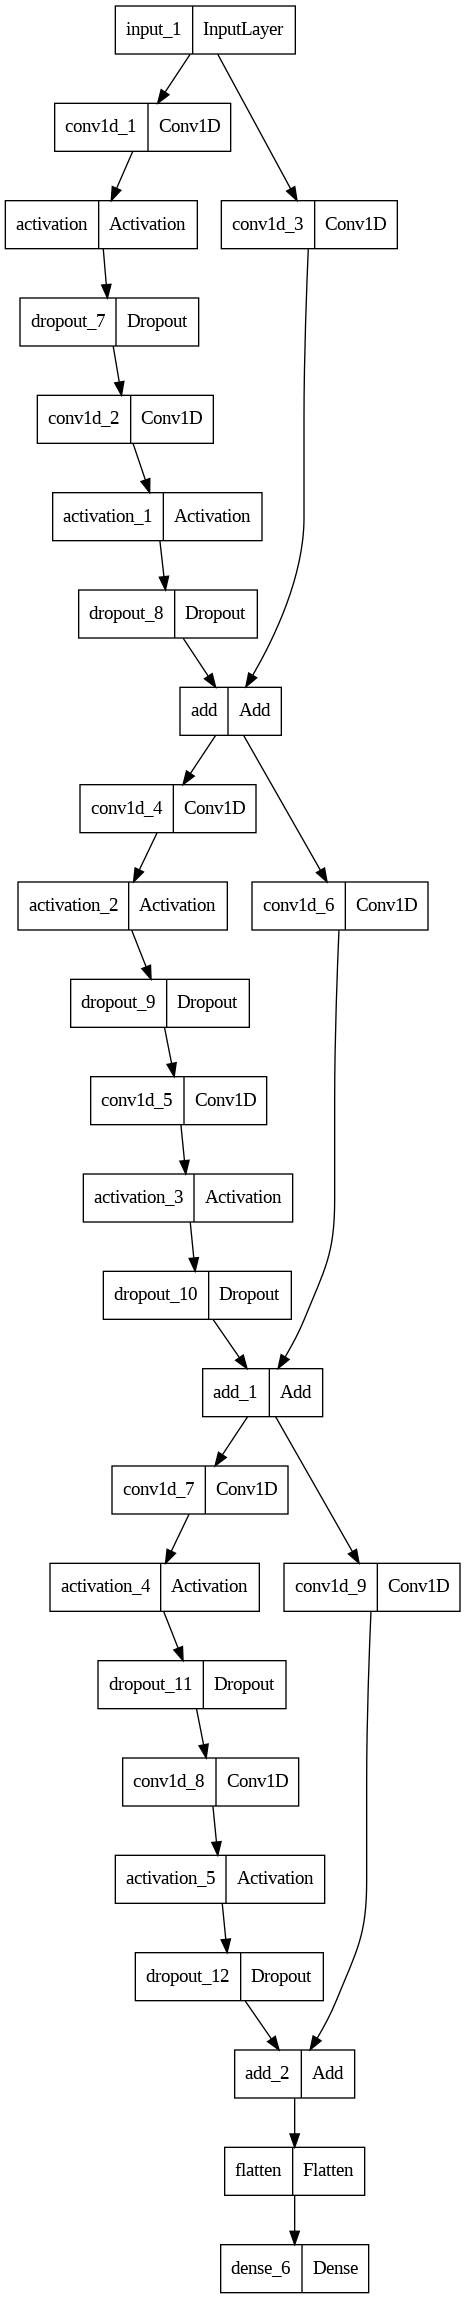

In [52]:
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [53]:
history_5 = model_5.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[create_tensorboard_callback('logs', 'model_5'),
               early_stopping,
               model_checkpoint,
               reduce_lr]
)

Saving TensorBoard log files to: logs/model_5/20240607-183721
Epoch 1/100
69/69 [==============================] - 6s 20ms/step - loss: 2149.9019 - mae: 2149.9019 - val_loss: 935.1985 - val_mae: 935.1985 - lr: 0.0010
Epoch 2/100
69/69 [==============================] - 1s 8ms/step - loss: 1420.8252 - mae: 1420.8252 - val_loss: 1062.2969 - val_mae: 1062.2969 - lr: 0.0010
Epoch 3/100
69/69 [==============================] - 1s 8ms/step - loss: 1085.1498 - mae: 1085.1498 - val_loss: 672.8611 - val_mae: 672.8611 - lr: 0.0010
Epoch 4/100
69/69 [==============================] - 1s 9ms/step - loss: 1002.7879 - mae: 1002.7879 - val_loss: 759.4433 - val_mae: 759.4433 - lr: 0.0010
Epoch 5/100
69/69 [==============================] - 1s 11ms/step - loss: 954.2094 - mae: 954.2094 - val_loss: 653.1393 - val_mae: 653.1393 - lr: 0.0010
Epoch 6/100
69/69 [==============================] - 1s 12ms/step - loss: 946.5807 - mae: 946.5807 - val_loss: 746.4061 - val_mae: 746.4061 - lr: 0.0010
Epoch 7/100
6

In [54]:
predictions_5 = model_5.predict(X_test)

18/18 [==============================] - 0s 2ms/step


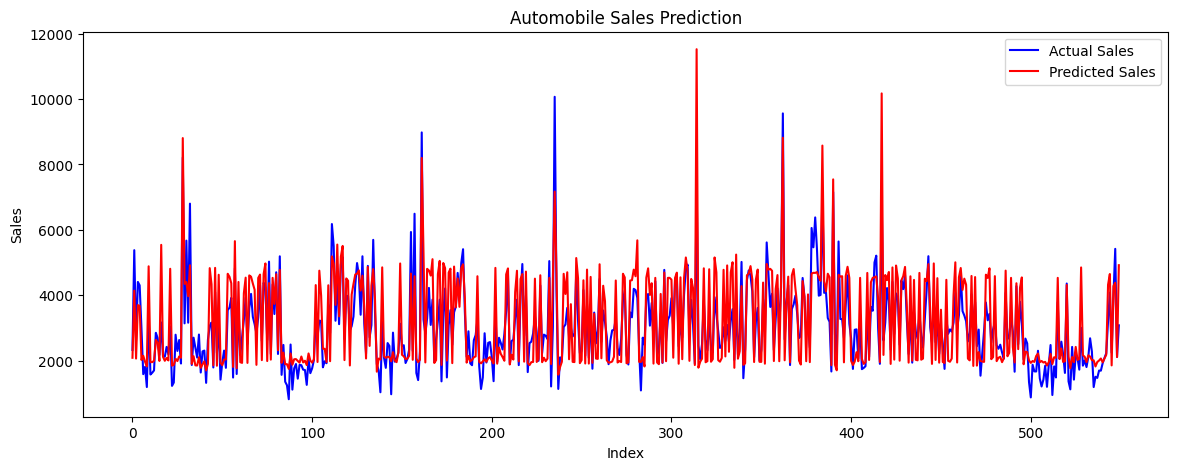

In [55]:
plt.figure(figsize=(14, 5))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Sales')
plt.plot(range(len(predictions_5)), predictions, color='red', label='Predicted Sales')
plt.title('Automobile Sales Prediction')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [56]:
model_5.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 698.4716 - mae: 698.4716


[698.4715576171875, 698.4715576171875]

In [57]:
model_5_preds = tf.squeeze(model_5.predict(X_test))
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2050.7502, 3625.0151, 1749.9233, 3620.2656, 3611.4607, 1717.5227,
       2599.5986, 1755.147 , 1605.562 , 4930.3164], dtype=float32)>

In [58]:
model_5_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_5_preds)
model_5_results

{'mae': 698.4716, 'mse': 882935.9, 'rmse': 939.64667, 'mape': 23.939112}

# Comparing Models

In [67]:
model_results = pd.DataFrame({"model_1": model_1_results,
                              "model_2": model_2_results,
                              "model_3": model_3_results,
                              "model_4": model_4_results,
                              "model_5": model_5_results
                              })
model_results

,model_1,model_2,model_3,model_4,model_5
mae,575.879395,9.149645e+02,9.461755e+02,610.215271,698.471619
mse,551668.125000,1.594477e+06,1.778702e+06,610762.187500,882935.875000
rmse,742.743652,1.262726e+03,1.333680e+03,781.512756,939.646667
mape,20.273466,3.338357e+01,3.136537e+01,22.016968,23.939112


# Conclusion

**Best Performing Model**: Model 1 now has the lowest MAE (575.88), MSE (551668.13), RMSE (742.74), and MAPE (20.27), indicating that it has the lowest overall errors among the five models.

**Second Best**: Model 4, which previously was the best performer, now comes in second with slightly higher MAE (610.22), MSE (610762.19), RMSE (781.51), and MAPE (22.02) compared to Model 1.

**Models 2 and 3**: These models continue to have significantly higher errors across all metrics, making them the least preferred models.

**Model 5**: This model performs moderately but not as well as Models 1 and 4. Its errors are higher in all metrics compared to Model 1 and Model 4.